# Simulation
## Assignment 3.1 – Common random numbers
#### Ari Viitala 432568

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The simulation code

In [131]:
def system2(lambda_c, mu_1, mu_2, seed):
    #creating a random number generator which is seeded with the seed given as an argument 
    seeder = np.random.RandomState()
    seeder.seed(seed)
    #creating the random number streams for all different processes
    rand_customers = np.random.RandomState()
    rand_server = np.random.RandomState()
    rand_switch = np.random.RandomState()
    #seeding the random number streams with the seeder random number generator
    rand_customers.seed(seeder.randint(1,1000000))
    rand_server.seed(seeder.randint(1,1000000))
    rand_switch.seed(seeder.randint(1,1000000))
    #the basic simulation variables like in every queue simulation
    t = 0
    n_out = 0
    customer = rand_customers.exponential(lambda_c)
    server1 = 10000000
    server2 = 10000000
    status1 = 0
    status2 = 0
    que1 = []
    que2 = []
    #total queuing time that is returned after the simulation
    que_t = 0
    
    while n_out < 100:
        #when a new customer arrives we update the queuetime    
        if customer < min(server1, server2):
            #update queue time 
            que_t += (customer - t) * (len(que1) + len(que2))
            #update simulation clock
            t = customer
            #the horrible if-else mess that decides what to do based on que lengths server statuses
            if len(que1) + status1 < len(que2) + status2:
                #if server is empty
                if status1 == 0:
                    #put person in server
                    server1 = t + rand_server.exponential(mu_1)
                    status1 = 1
                else:
                    #else put him in the que with their service time
                    #we calculate the service time here, since we want each customer to have similar service times in each simulation               
                    que1.append(rand_server.exponential(mu_1))
            elif len(que2) + status2 < len(que1) + status1:
                if status2 == 0:
                    server2 = t + rand_server.exponential(mu_2)
                    status2 = 1
                else:
                    que2.append(rand_server.exponential(mu_2))
            #if queues are equal length
            elif rand_switch.rand() < 0.5:
                if status1 == 0:
                    server1 = t + rand_server.exponential(mu_1)
                    status1 = 1
                else:
                    que1.append(rand_server.exponential(mu_1))
            else:
                if status2 == 0:
                    server2 = t + rand_server.exponential(mu_2)
                    status2 = 1
                else:
                    que2.append(rand_server.exponential(mu_2))
            #creating a new customer 
            customer = t + rand_customers.exponential(lambda_c)
        else:
            #see which server is ready
            ready = min(server1, server2)
            #update queue time
            que_t += (ready - t) * (len(que1) + len(que2))
            n_out += 1
            #update simulation clock
            t = ready
            #take a customer into a server from que or make the server empty
            if server1 < server2:
                if len(que1) == 0:
                    status1 = 0
                    server1 = 100000000
                else:
                    #now we use the pre determined service time from the que
                    server1 = t + que1.pop(0)
            elif len(que2) == 0:
                status2 = 0
                server2 = 100000000
            else:
                server2 = t + que2.pop(0)
    #return the total queuing time before the 100th customer leavest the system
    return que_t / 100

#### The simulation does not take into account if there are people queuing while the 100th customer is being served and the time that 100th customer spends in the server is inclued also. However this is the same for all simulations and the effect should be small.

### Running the simulation

In [127]:
#vectors to store the simulation results
times1 = []
times2 = []
CRN_times1 = []
CRN_times2 = []
#the generator for seeding different runs of the simulations
s = np.random
hi = 1000000
lo = 1
#simulationg 100 different iterations with independent random numbers and common random numbers
for i in range(0,100):
    seed = s.randint(lo, hi)
    #independent simulations
    times1.append(system2(1, 1/0.6, 1/0.6, s.randint(lo,hi)))
    times2.append(system2(1, 1/0.3, 1/0.9, s.randint(lo,hi)))
    #CRN simulations 
    CRN_times1.append(system2(1, 1/0.6, 1/0.6, seed))
    CRN_times2.append(system2(1, 1/0.3, 1/0.9, seed))

In [128]:
#taking the difference between different server speeds 
diff = np.array(times1) - np.array(times2)
CRN_diff = np.array(CRN_times1) - np.array(CRN_times2)
#calculating mean and standard deviation between the simulations with different server speeds
print("Mean with independent random numbers: " + str(np.mean(diff)))
print("Standard deviation with independent random numbers: " + str(np.std(diff)))
print("Mean with CRN: " + str(np.mean(CRN_diff)))
print("Standard deviation with CRN: " + str(np.std(CRN_diff)))

Mean with independent random numbers: -0.600961749712
Standard deviation with independent random numbers: 3.21045839022
Mean with CRN: -0.595224667869
Standard deviation with CRN: 0.533150006403


#### We see that with common random numbers the standard deviation between the iterations is greatly decreased. The mean is about the same between the cases so it seems that the configuration with $\mu_1 = 0.3$ and $\mu_2 = 0.9$ is a bit slower since the mean is negative in both cases. 

### Plotting scatter plots and histograms to visualize the distributions of the results

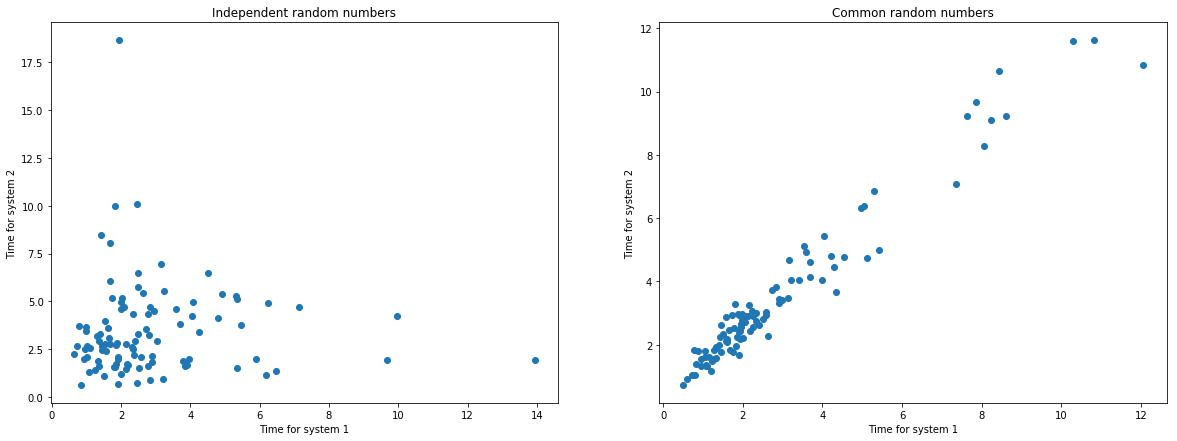

In [129]:
plt.figure(1, (20,7))
plt.subplot(121)
plt.scatter(times1, times2)
plt.xlabel("Time for system 1")
plt.ylabel("Time for system 2")
plt.title("Independent random numbers")
plt.subplot(122)
plt.scatter(CRN_times1, CRN_times2)
plt.xlabel("Time for system 1")
plt.ylabel("Time for system 2")
plt.title("Common random numbers")

In [130]:
print("The correlation matrix for system times:")
print(np.corrcoef(CRN_times1, CRN_times2))

The correlation matrix for system times:
[[ 1.          0.97618191]
 [ 0.97618191  1.        ]]


#### Scatterplots of the times for both independent and common random numbers and the correlation matrix reveal that there is heavy correlation between times for the common random numbers.

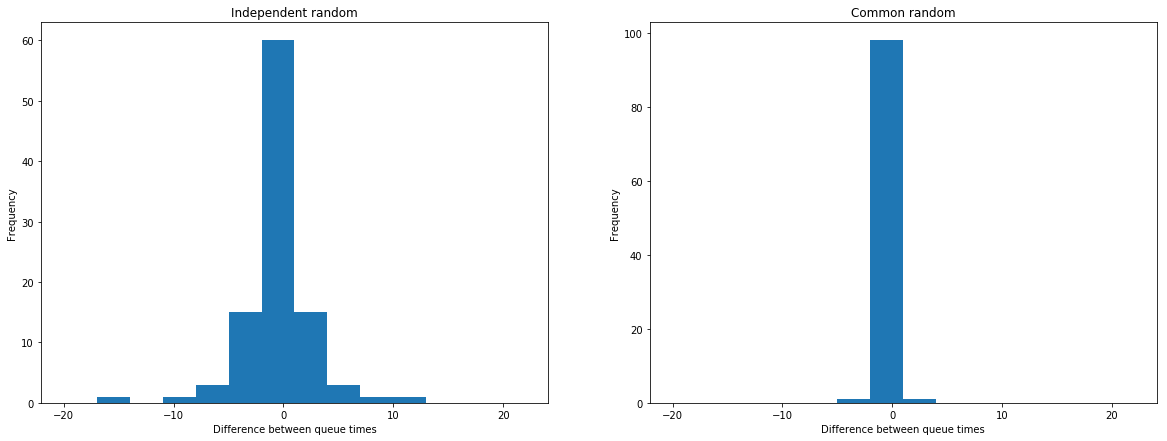

In [135]:
plt.figure(1, (20, 7))
plt.subplot(121)
plt.hist(diff, bins = list(range(-20,24, 3)))
plt.xlabel("Difference between queue times")
plt.ylabel("Frequency")
plt.title("Independent random")
plt.subplot(122)
plt.hist(CRN_diff, bins = list(range(-20,24, 3)))
plt.xlabel("Difference between queue times")
plt.ylabel("Frequency")
plt.title("Common random")
plt.show()

#### From the histogram of the queue time differences we see that with common random numbers the histogram has a much higher peak. This means that the deviation in differences is much smaller. Clearly, using common random numbers between simulations we can decrease the standard deviation withing simulation runs without increasing the amount of iterations.